# Heart Disease UCI


## Table of contents


## Introduction
### Link to the Hert Disease UCI dataset on [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci).




In [1]:
%%time 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint as sp_randint

print('Loading dependencies.')


Loading dependencies.
Wall time: 17.2 s


In [2]:
import warnings
warnings.filterwarnings('ignore')


### Attribute Information:
- 1 age
- 2 sex
    - 0 = female
    - 1 = male
- 3 cp (chest pain type (4 values))
    - 1 typical angina
    - 2 atypical angina
    - 3 nonanginal pain
    - asymptomatic
- 4 resting blood pressure (in mm Hg on admission to the hospital)
- 5 chol (serum cholestoral in mg/dl)
- 6 fbs (fasting blood sugar over 120mg/dl)
    - 0 = false
    - 1 = true
- 7 restingecg (resting electrocardiographic results (values 0, 1, 2))
    - 0: Normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- 8 thalach (maximum heart rate achieved)
- 9 exang (exercise induced angina)
    - 0 = false
    - 1 = true
- 10 oldpeak (ST depression induced by exercise relative to rest)
- 11 slope (slope of the peak exercise ST segment)
- 12 ca (number of major vessels (0-3) colored by flourosopy)
- 13 thal
    - 3 = normal
    - 6 = fixed defect
    - 7 = reversable defect
- 14 target
    - 0 = absence of heart disease in the patient
    - 1 = presence of heart disease in the patient



## Preparing the data

In [3]:
data = pd.read_csv('heart.csv')
print('Shape of the data:\n{}'.format(data.shape))


Shape of the data:
(303, 14)


In the data are 13 features of 303 patients and the target variable, describing the presence (target = 1)
or absence (target = 0) of heart disease. The 13 features are either categorical, or continuous. 


Looking for missing values in the dataset.


In [4]:
print('Missing values per feature:\n{}'.format(data.isnull().sum()))


Missing values per feature:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
data.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Looking for zero values in the continuous features.  
  
  
Continues features:
- age, trestbps, chol, thalach, oldpeak

Categorical features:
- sex, cp, fbs, restecg, exang, slope, ca, thal


In [6]:
f_cont = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
f_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


print('Zero values per continuous feature:\n{}'.format((data[f_cont] == 0).sum()))


Zero values per continuous feature:
age          0
trestbps     0
chol         0
thalach      0
oldpeak     99
dtype: int64


Found zero value in feature 'thal'.


In [7]:
print('Zero values in feautre \'thal\':\n{}'.format(data['thal'].loc[data['thal'] == 0].count()))


Zero values in feautre 'thal':
2


In 2 rows thal feature takes the value of 0. Since this feature should only take the values 3, 6 and 7, these 2 rows are dropped
for now.


In [8]:
data = data.drop(data['thal'].loc[data['thal'] == 0].index)


In [9]:
features_cat2 = ['cp', 'restecg', 'slope', 'thal']
data_processed = pd.get_dummies(data, columns=features_cat2)



In [10]:
data_processed.columns = ['age',
                'sex_male',
                'resting_blood_pressure',
                'serum_cholestoral_in_mg/dl',
                'fasting_blood_sugar_over_120_mgdl',
                'maximum_heart_rate_achieved',
                'exercise_induced_angina',
                'st_depression_induced_by_exercise_relative_to_rest',
                'num_of_major_vessels_colored',
                'target',
                'chest_pain_type_typical_angina',
                'chest_pain_type_atypical_angina',
                'chest_pain_type_non_anginal_pain',
                'chest_pain_type_asymptomatic',
                'resting_ecg_results_normal',
                'resting_ecg_results_having_st_t_wave_abnormality',
                'resting_ecg_results_probable_or_definite_left_ventricular_hypertrophy',
                'slope_upsloping',
                'slope_flat',
                'slope_downsloping',
                'thal_normal',
                'thal_fixed_defect',
                'thal_reversable_defect']


In [11]:
data_processed.keys()


Index(['age', 'sex_male', 'resting_blood_pressure',
       'serum_cholestoral_in_mg/dl', 'fasting_blood_sugar_over_120_mgdl',
       'maximum_heart_rate_achieved', 'exercise_induced_angina',
       'st_depression_induced_by_exercise_relative_to_rest',
       'num_of_major_vessels_colored', 'target',
       'chest_pain_type_typical_angina', 'chest_pain_type_atypical_angina',
       'chest_pain_type_non_anginal_pain', 'chest_pain_type_asymptomatic',
       'resting_ecg_results_normal',
       'resting_ecg_results_having_st_t_wave_abnormality',
       'resting_ecg_results_probable_or_definite_left_ventricular_hypertrophy',
       'slope_upsloping', 'slope_flat', 'slope_downsloping', 'thal_normal',
       'thal_fixed_defect', 'thal_reversable_defect'],
      dtype='object')

In [12]:
data_processed.sex_male = data_processed.sex_male.astype('category')
data_processed.fasting_blood_sugar_over_120_mgdl = data_processed.fasting_blood_sugar_over_120_mgdl.astype('category')
data_processed.exercise_induced_angina = data_processed.exercise_induced_angina.astype('category')
data_processed.chest_pain_type_typical_angina = data_processed.chest_pain_type_typical_angina.astype('category')
data_processed.chest_pain_type_atypical_angina = data_processed.chest_pain_type_atypical_angina.astype('category')
data_processed.chest_pain_type_non_anginal_pain  = data_processed.chest_pain_type_non_anginal_pain.astype('category')
data_processed.chest_pain_type_asymptomatic = data_processed.chest_pain_type_asymptomatic.astype('category')
data_processed.resting_ecg_results_normal = data_processed.resting_ecg_results_normal.astype('category')
data_processed.resting_ecg_results_having_st_t_wave_abnormality = \
    data_processed.resting_ecg_results_having_st_t_wave_abnormality.astype('category')
data_processed.resting_ecg_results_probable_or_definite_left_ventricular_hypertrophy = \
    data_processed.resting_ecg_results_probable_or_definite_left_ventricular_hypertrophy.astype('category')
data_processed.slope_upsloping = data_processed.slope_upsloping.astype('category')
data_processed.slope_flat = data_processed.slope_flat.astype('category')
data_processed.slope_downsloping = data_processed.slope_downsloping.astype('category')
data_processed.thal_normal = data_processed.thal_normal.astype('category')
data_processed.thal_fixed_defect = data_processed.thal_fixed_defect.astype('category')
data_processed.thal_reversable_defect = data_processed.thal_reversable_defect.astype('category')


In [13]:
data_processed.dtypes


age                                                                         int64
sex_male                                                                 category
resting_blood_pressure                                                      int64
serum_cholestoral_in_mg/dl                                                  int64
fasting_blood_sugar_over_120_mgdl                                        category
maximum_heart_rate_achieved                                                 int64
exercise_induced_angina                                                  category
st_depression_induced_by_exercise_relative_to_rest                        float64
num_of_major_vessels_colored                                                int64
target                                                                      int64
chest_pain_type_typical_angina                                           category
chest_pain_type_atypical_angina                                          category
chest_pain_type_

In [14]:
features_cat = data_processed.loc[:, data_processed.dtypes == 'category'].columns
features_cont = data_processed.loc[:, data_processed.dtypes != 'category'].columns
features_cont = features_cont.drop('target')

In [15]:
data_target = data_processed.loc[data['target'] == 1]
data_nontarget = data_processed.loc[data['target'] == 0]


## Exploratory data analysis
### Balance of classes in the target variable.


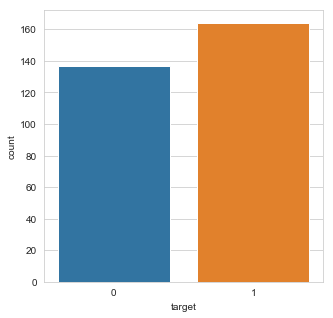

In [16]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(data['target'])


### Distribution of features by target.


In [17]:
def plot_distributions_cont(target, nontarget, features):
    i = 0
    plt.figure(figsize=(18, 22))
    for feature in features:
        i += 1
        plt.subplot(6, 2, i)
        sns.distplot(target[feature], color = 'red', hist=False, label='target = 1')
        sns.distplot(nontarget[feature], color = 'blue', hist=False, label='tarbet = 0')
        plt.legend()
    plt.show()
    

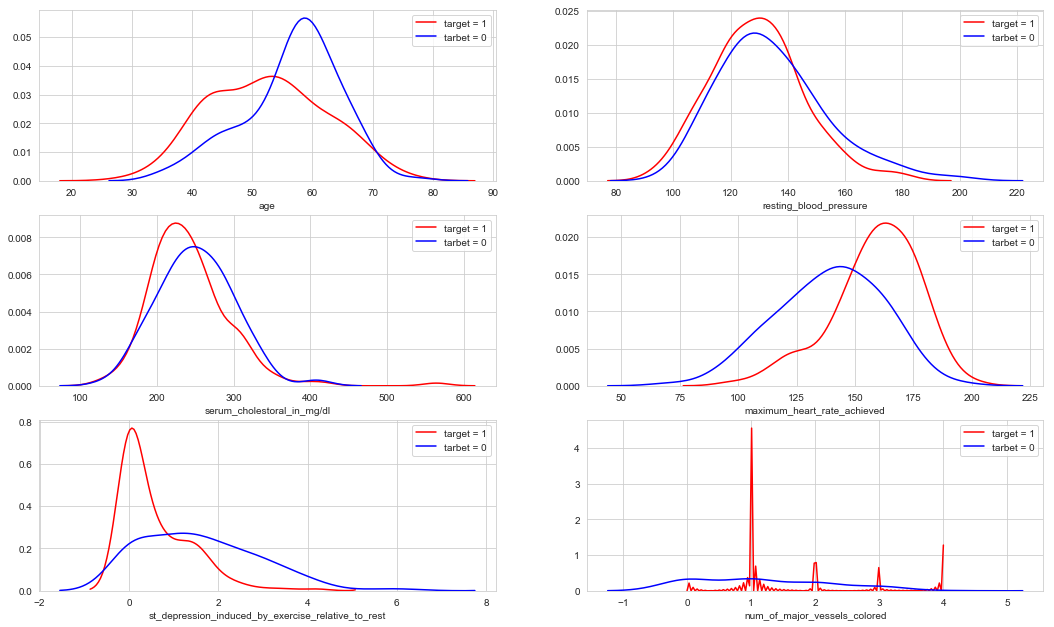

In [18]:
plot_distributions_cont(data_target, data_nontarget, features_cont)



In [29]:
def plot_distributions_count(df, features):
    i = 0
    plt.figure(figsize=(18, 30))
    for feature in features:
        i += 1
        plt.subplot(8, 2, i)
        sns.countplot(y='target', hue=feature, data=df, saturation=0.6)
    plt.show()
    

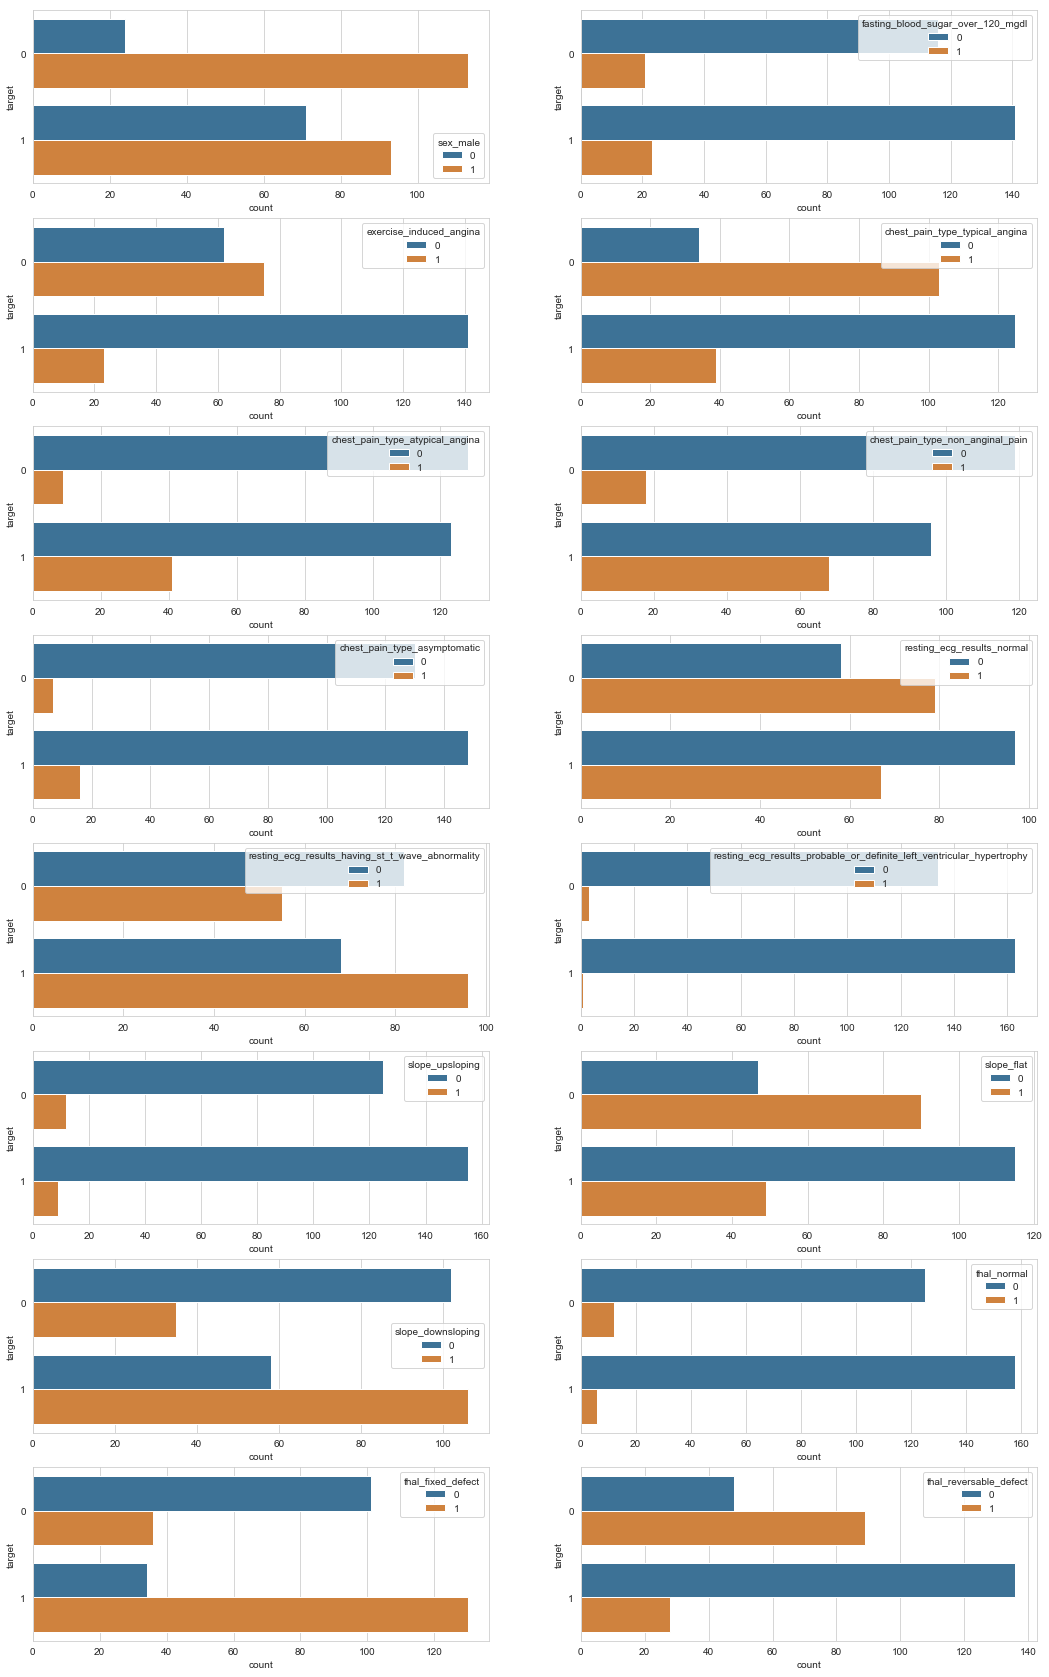

In [30]:
plot_distributions_count(data_processed, features_cat)



In [20]:
data_processed['sex_male'].value_counts()[0]

  


95

## Model
Creating a train and test set. The target feature is roughly balanced, so no need to stratify the data.


In [21]:
X = data_processed.drop(columns='target')
y = data_processed['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


### Random Forest Classifier


Setting parameters for the randomized search.




In [60]:
params_rfc = {'max_depth' : [2, 5],
              'max_features' : sp_randint(1, 22),
              'min_samples_split' : sp_randint(2, 15),
              'min_samples_leaf' : sp_randint(1, 15),
              'bootstrap' : [True, False],
              'n_estimators' : sp_randint(1,30)
              }

{'max_depth': [2, 5], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000238520A3B38>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002385179D390>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000238520A3470>, 'bootstrap': [True, False], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000238520A3DA0>}


In [103]:
%%time

rscv = RandomizedSearchCV(param_distributions=params_rfc, estimator = RandomForestClassifier(), scoring='accuracy',
                          verbose=0, n_iter=100, cv=5, random_state=0)


Wall time: 2.99 ms


In [104]:
%%time
rscv.fit(X_train, y_train)


Wall time: 11.3 s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'max_depth': [2, 5], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000238520A3B38>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002385179D390>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000238520A3470>, 'bootstrap': [True, False], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen obj

In [55]:
print('Score for best accuracy:\n{}'.format(rscv.best_score_))


Score for best accuracy:
0.8444444444444444


0.8444444444444444

In [54]:
print('Parameters for the best score:')
rscv.best_params_


Parameters for the best score:


{'bootstrap': True,
 'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 14}

Fitting a random forest classifier with the parameters, that achieved the highest score in the randomized search.

In [56]:
rfc_bp = rscv.best_params_

rfc = RandomForestClassifier(bootstrap=rfc_bp['bootstrap'],
                             max_depth=rfc_bp['max_depth'],
                             max_features=rfc_bp['max_features'],
                             min_samples_leaf=rfc_bp['min_samples_leaf'],
                             min_samples_split=rfc_bp['min_samples_split'],
                             n_estimators=rfc_bp['n_estimators'])

rfc_fitted = rfc.fit(X_train, y_train)

y_predicted = rfc_fitted.predict(X_test)

print('The area under the ROC curve is:\n{}'.format(roc_auc_score(y_test, y_predicted)))



The area under the ROC curve is:
0.8421052631578948


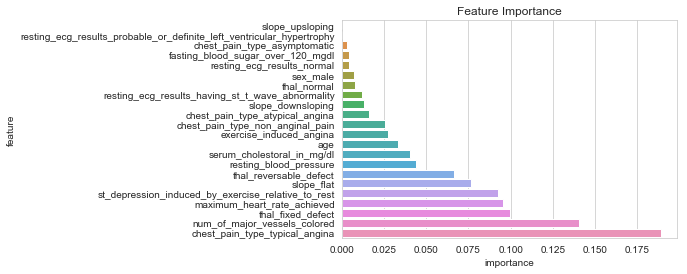

In [48]:
feats = X_train.columns
importance = pd.DataFrame({'importance' : rfc_fitted.feature_importances_, 'feature' :feats})

plt.title('Feature Importance')
sns.barplot(x='importance', y='feature', data=importance.sort_values(by='importance', ascending=True))



### Linear Classification: Logistic Regression
Setting the parameters for a randomized search.


In [86]:
params_lrc = {'penalty' : ['l1', 'l2'],
              'C' : np.geomspace(0.01, 100, 5),
              'class_weight' : [None, 'balanced'],
              }


In [91]:
lr_s = RandomizedSearchCV(param_distributions=params_lrc, estimator=LogisticRegression(), scoring='accuracy', 
                        verbose=0, n_iter=100, cv=5, random_state=0)

In [92]:
%%time
lr_s.fit(X_train, y_train)


Wall time: 1.64 s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'penalty': ['l1', 'l2'], 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [93]:
print('Score for best accuracy:\n{}'.format(lr_s.best_score_))


Score for best accuracy:
0.8444444444444444


In [97]:
print('Parameters for the best score:')
lr_s.best_params_


Parameters for the best score:


{'penalty': 'l2', 'class_weight': 'balanced', 'C': 1.0}

In [ ]:
lr_s_bp = lr_s.best_params_


Fitting a logistic regression model with the parameters, that achieved the highest score in the randomized search.


In [98]:
lr  = LogisticRegression(penalty=lr_s_bp['penalty'],
                         class_weight=lr_s_bp['class_weight'],
                         C=lr_s_bp['C'])


In [99]:
lr_fitted = lr.fit(X_train, y_train)

y_predicted = lr_fitted.predict(X_test)

print('The area under the ROC curve is:\n{}'.format(roc_auc_score(y_test, y_predicted)))



The area under the ROC curve is:
0.8421052631578948


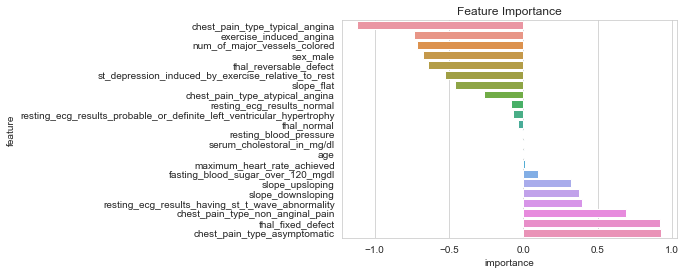

In [102]:
feats = X_train.columns
importance = pd.DataFrame({'importance' : lr_fitted.coef_[0], 'feature' :feats})

plt.title('Feature Importance')
sns.barplot(x='importance', y='feature', data=importance.sort_values(by='importance', ascending=True))


